### 1. Matplotlib - 기본 그래프 도구 
**- 시각화 도구**
   1. 데이터 구조와 패턴 파악 용이
   2. 다양한 관점에서 데이터에 관한 통찰력 제공
   
**-Matplotlib**
   - 2D 평면 그래프에 관한 다양한 포맷과 기능 지원
   - 객체지향 프로그래밍 지원

#### 1-1. 선 그래프

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('./data/시도별 전출입 인구수.xlsx', header = 0)
df = df.fillna(method = 'ffill')

In [15]:
# 서울에서 다른 지역으로 이동한 데이터만 추출해 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별']!= '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True)

df_seoul.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [16]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

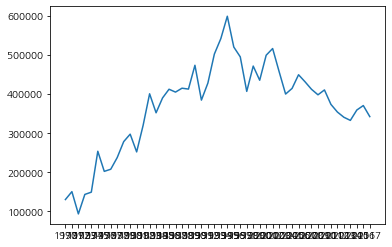

In [17]:
# 년도별 서울->경기도 이동 인구 수
plt.plot(sr_one.index, sr_one.values)

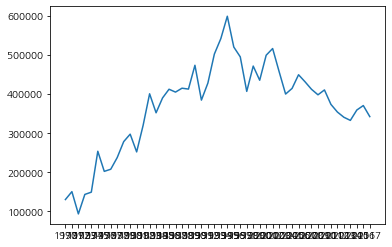

In [18]:
plt.plot(sr_one)

In [23]:
# Matplotlib 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "./data/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font_name)

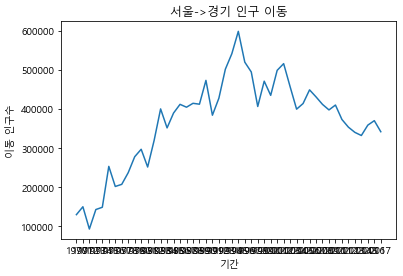

In [24]:
# 차트제목, 축 이름 추가
plt.plot(sr_one.index, sr_one.values)
plt.title('서울->경기 인구 이동') # 차트 제목 추가
plt.xlabel('기간') # x 축 이름 추가
plt.ylabel('이동 인구수') # y 축 이름 추가
# 변경사항 저장하고 그래프 출력
plt.show()

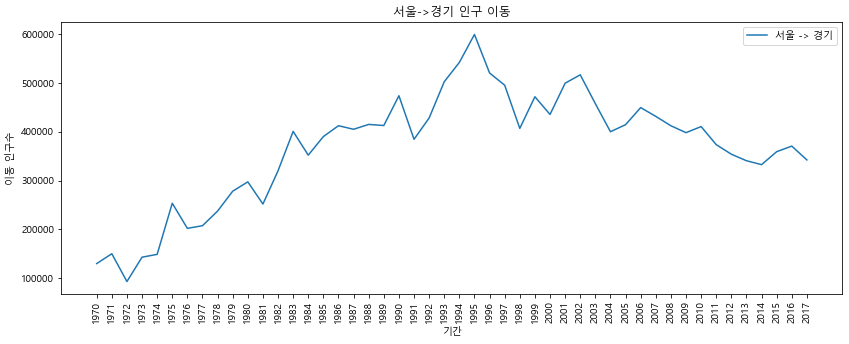

In [26]:
# 그래프 꾸미기
# x축 글자 겹치지 않도록 공간 확보
# 1. figure() : 그림틀의 가로 사이즈 확보
# 2. xticks() : x축 눈금 라벨 반시계 90도 회전
plt.figure(figsize = (14,5))

plt.xticks(rotation = 'vertical')

plt.plot(sr_one.index, sr_one.values)

plt.title('서울->경기 인구 이동') # 차트 제목 추가
plt.xlabel('기간') # x 축 이름 추가
plt.ylabel('이동 인구수') # y 축 이름 추가

plt.legend(labels = ['서울 -> 경기'], loc = 'best') # 범례 표시

plt.show()

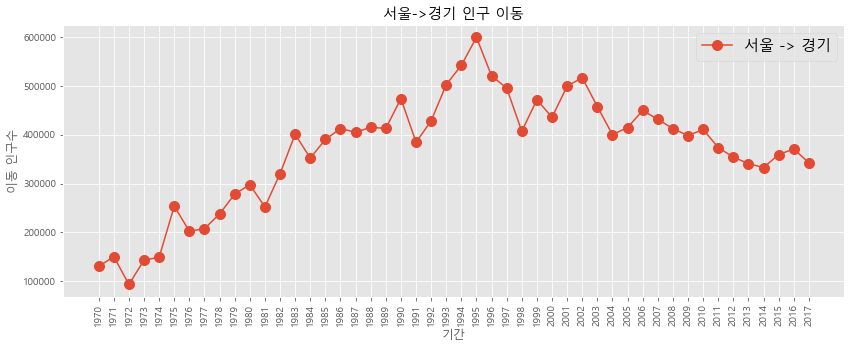

In [27]:
# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정
plt.figure(figsize = (14,5))

# x축 눈금 라벨 회전
plt.xticks(size=10, rotation = 'vertical')

# x,y축 데이터 plot함수에 입력
plt.plot(sr_one.index, sr_one.values, marker = 'o', markersize = 10) # 마커 표시 추가

plt.title('서울->경기 인구 이동') # 차트 제목 추가
plt.xlabel('기간') # x 축 이름 추가
plt.ylabel('이동 인구수') # y 축 이름 추가

plt.legend(labels = ['서울 -> 경기'], loc = 'best', fontsize = 15) # 범례 표시

plt.show()

In [28]:
# Matplotlib 스타일 서식 종류
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


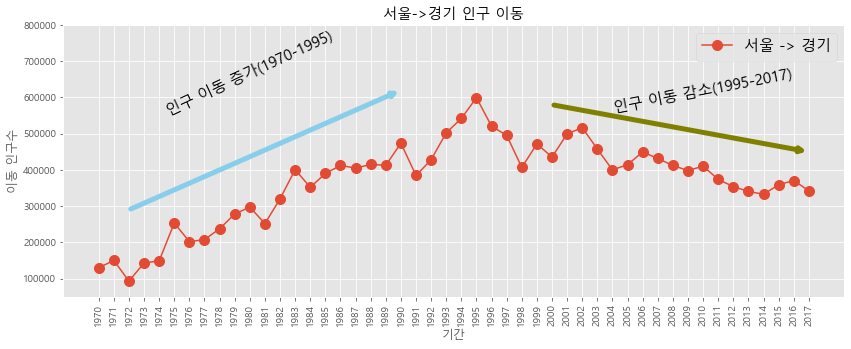

In [30]:
# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정
plt.figure(figsize = (14,5))

# x축 눈금 라벨 회전
plt.xticks(size=10, rotation = 'vertical')

# x,y축 데이터 plot함수에 입력
plt.plot(sr_one.index, sr_one.values, marker = 'o', markersize = 10) # 마커 표시 추가

plt.title('서울->경기 인구 이동') # 차트 제목 추가
plt.xlabel('기간') # x 축 이름 추가
plt.ylabel('이동 인구수') # y 축 이름 추가

plt.legend(labels = ['서울 -> 경기'], loc = 'best', fontsize = 15) # 범례 표시

# 그래프에 주석 붙이기
plt.ylim(50000, 800000) # y축 범위 지정(최소값, 최대값)

# 주석표시 - 화살표
plt.annotate('',
            xy = (20, 620000), # 화살표 머리 부분 (끝점)
            xytext = (2,290000), # 화살표 꼬리 부분 (시작점)
            xycoords = 'data', # 좌표체계
            arrowprops = dict(arrowstyle = '->', color = 'skyblue', lw = 5)) # 화살표 서식
plt.annotate('',
            xy = (47, 450000), # 화살표 머리 부분 (끝점)
            xytext = (30,580000), # 화살표 꼬리 부분 (시작점)
            xycoords = 'data', # 좌표체계
            arrowprops = dict(arrowstyle = '->', color = 'olive', lw = 5)) # 화살표 서식
# 주석표시 - 텍스트
plt.annotate('인구 이동 증가(1970-1995)', # 텍스트 입력
            xy = (10, 550000), # 텍스트 위치 기준점
            rotation = 25, # 텍스트 회전 각도
            va = 'baseline', # 텍스트 상하 정렬 ( center, top, bottom, baseline )
            ha = 'center', # 텍스트 좌우 정렬 ( center, left, right )
            fontsize = 15 # 텍스트 크기
            )
plt.annotate('인구 이동 감소(1995-2017)', # 텍스트 입력
            xy = (40, 560000), # 텍스트 위치 기준점
            rotation = 11, # 텍스트 회전 각도
            va = 'baseline', # 텍스트 상하 정렬
            ha = 'center', # 텍스트 좌우 정렬
            fontsize = 15 # 텍스트 크기
            )
plt.show()
# 1990년대 중반까지는 경기도권 5대 신도시(분당, 일산 등) 개발로 서울 인구의 대규모 경기도 유입이
# 있었음을 추청할 수 있다. 이 시기를 정점으로 서울에서 경기로 이동하는 인구는 현재까지 감소하는
# 경향을 보이고 있다.

##### 화면 분할하여 그래프 여러개 그리기 - axe 객체 활용
- 여러개의 axe 객체 만든 후, 분할된 화면마다 axe 객체 하나씩 배정
- axe 객체는 각각 서로 다른 그래프 표현 가능
- fig 객체에 add_subplot() 메소드 사용 -> 그림틀 여러개로 분할, 이때 각 부분을 axe 객체라 부름.

<ipython-input-31-12786e38261f>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation = 75)
<ipython-input-31-12786e38261f>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation = 75)


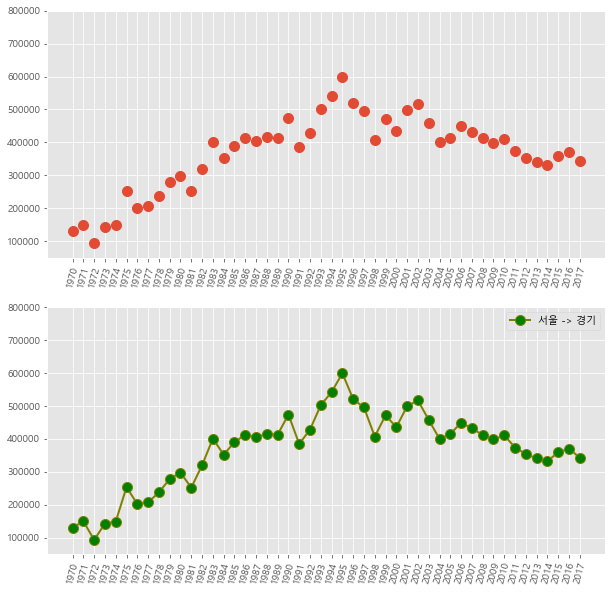

In [31]:
# 그래프 객체 생성
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(2,1,1) # 2행 1열 1번째
ax2 = fig.add_subplot(2,1,2) # 2행 1열 2번째

# axe 객체에 그래프 출력
ax1.plot(sr_one, 'o', markersize = 10)
ax2.plot(sr_one, marker = 'o', # 마커 모양 (o,+,*,.)
         markerfacecolor = 'green', # 마커 배경 색
         markersize = 10,
         color = 'olive', # 선 색
         linewidth = 2,  # 선 두께
         label = '서울 -> 경기') # 라벨 지정ㅎ
ax2.legend(loc = 'best')

# y축 범위 지정
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation = 75)
ax2.set_xticklabels(sr_one.index, rotation = 75)

plt.show()

<ipython-input-33-aa7656fbe5ed>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sr_one.index, rotation = 75)


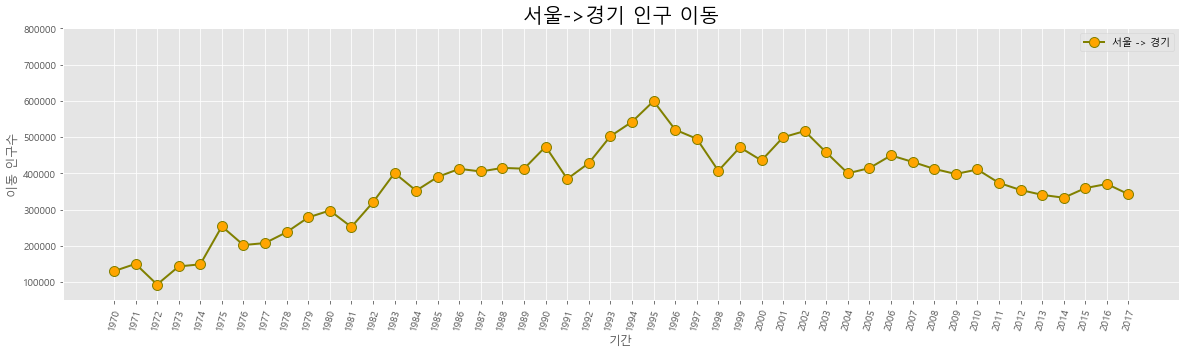

In [33]:
# axe 객체 그래프 꾸미기
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(1,1,1)

ax.plot(sr_one, marker = 'o', markerfacecolor = 'orange', markersize = 10,
       color = 'olive', linewidth = 2, label = '서울 -> 경기')
ax.legend(loc = 'best')

ax.set_ylim(50000,800000)

ax.set_title('서울->경기 인구 이동', size = 20)

ax.set_xlabel('기간', size = 12)
ax.set_ylabel('이동 인구수', size = 12)

ax.set_xticklabels(sr_one.index, rotation = 75)
# 축 눈금 라벨 크기
ax.tick_params(axis ='x', labelsize = 10)
ax.tick_params(axis ='y', labelsize = 10)

plt.show()

<ipython-input-34-68fa34c3ec58>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation = 90)


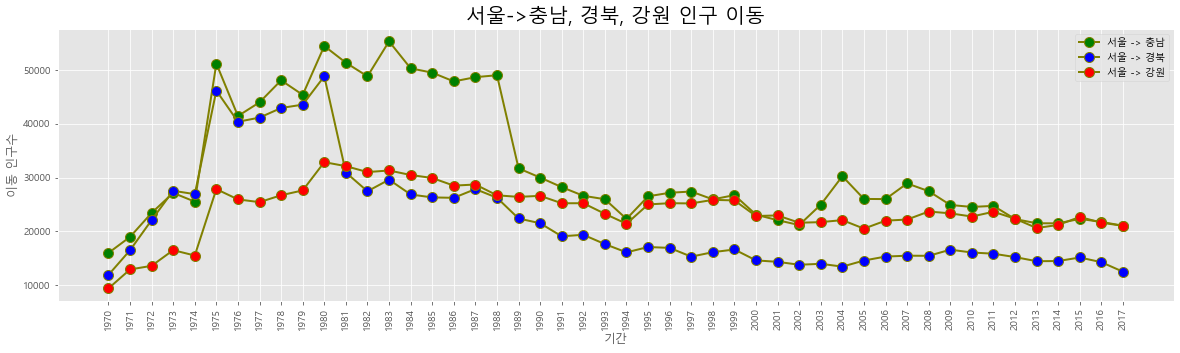

In [34]:
# 같은 화면에 그래프 추가

# 서울에서 '충청남도', '경상북도', '강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970,2018)))
df_3 = df_seoul.loc[['충청남도','경상북도','강원도'], col_years]

plt.style.use('ggplot')

fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(1,1,1)

ax.plot(col_years, df_3.loc['충청남도',:], marker = 'o', markerfacecolor = 'green',
       markersize = 10, color = 'olive', linewidth = 2, label = '서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도',:], marker = 'o', markerfacecolor = 'blue',
       markersize = 10, color = 'olive', linewidth = 2, label = '서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도',:], marker = 'o', markerfacecolor = 'red',
       markersize = 10, color = 'olive', linewidth = 2, label = '서울 -> 강원')

ax.legend(loc='best')

ax.set_title('서울->충남, 경북, 강원 인구 이동', size = 20)

ax.set_xlabel('기간', size = 12)
ax.set_ylabel('이동 인구수', size = 12)

ax.set_xticklabels(col_years, rotation = 90)

ax.tick_params(axis = 'x', labelsize = 10)
ax.tick_params(axis = 'y', labelsize = 10)

plt.show()
# 지리적으로 가까운 충남 지역으로 이동한 인구가 다른 두 지역에 비해 많은 편이다.
# 전반적으로 1970-80년대에는 서울에서 지방으로 전출 인구가 많았으나, 1990년 이후로는 줄곧 감소하는 패턴을 보인다.

<ipython-input-35-ba565ff75821>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation = 90)
<ipython-input-35-ba565ff75821>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation = 90)
<ipython-input-35-ba565ff75821>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation = 90)
<ipython-input-35-ba565ff75821>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation = 90)


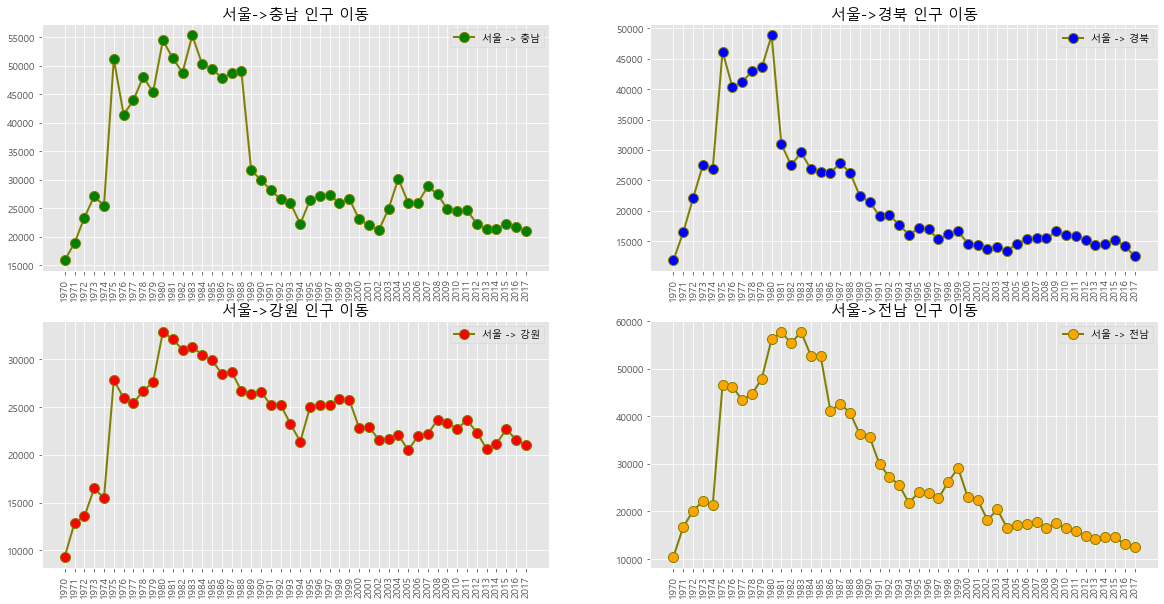

In [35]:
# 화면 4분할 그래프
# 서울에서 '충청남도', '경상북도', '강원도','전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970,2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'], col_years]

plt.style.use('ggplot')

fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(col_years, df_4.loc['충청남도',:], marker = 'o', markerfacecolor = 'green',
       markersize = 10, color = 'olive', linewidth = 2, label = '서울 -> 충남')
ax2.plot(col_years, df_4.loc['경상북도',:], marker = 'o', markerfacecolor = 'blue',
       markersize = 10, color = 'olive', linewidth = 2, label = '서울 -> 경북')
ax3.plot(col_years, df_4.loc['강원도',:], marker = 'o', markerfacecolor = 'red',
       markersize = 10, color = 'olive', linewidth = 2, label = '서울 -> 강원')
ax4.plot(col_years, df_4.loc['전라남도',:], marker = 'o', markerfacecolor = 'orange',
       markersize = 10, color = 'olive', linewidth = 2, label = '서울 -> 전남')

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

ax1.set_title('서울->충남 인구 이동', size = 15)
ax2.set_title('서울->경북 인구 이동', size = 15)
ax3.set_title('서울->강원 인구 이동', size = 15)
ax4.set_title('서울->전남 인구 이동', size = 15)

ax1.set_xticklabels(col_years, rotation = 90)
ax2.set_xticklabels(col_years, rotation = 90)
ax3.set_xticklabels(col_years, rotation = 90)
ax4.set_xticklabels(col_years, rotation = 90)ㅠ

plt.show()

In [37]:
# matplotlib에서 사용 가능한 색상 종류
import matplotlib

colors = {}

for name, hex in matplotlib.colors.cnames.items():
    colors[name] = hex
    
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

#### 1-2. 면적 그래프
- 각 열의 데이터를 선 그래프로 구현 후 선 그래프와 x축 사이 공간에 색 입힘.
- 투명도(alpha) : 기본값 0.5 (0 ~ 1)
- plot() 메소드에 kind = 'area' 옵션 추가
- stacked = True : 그래프 누적 여부 

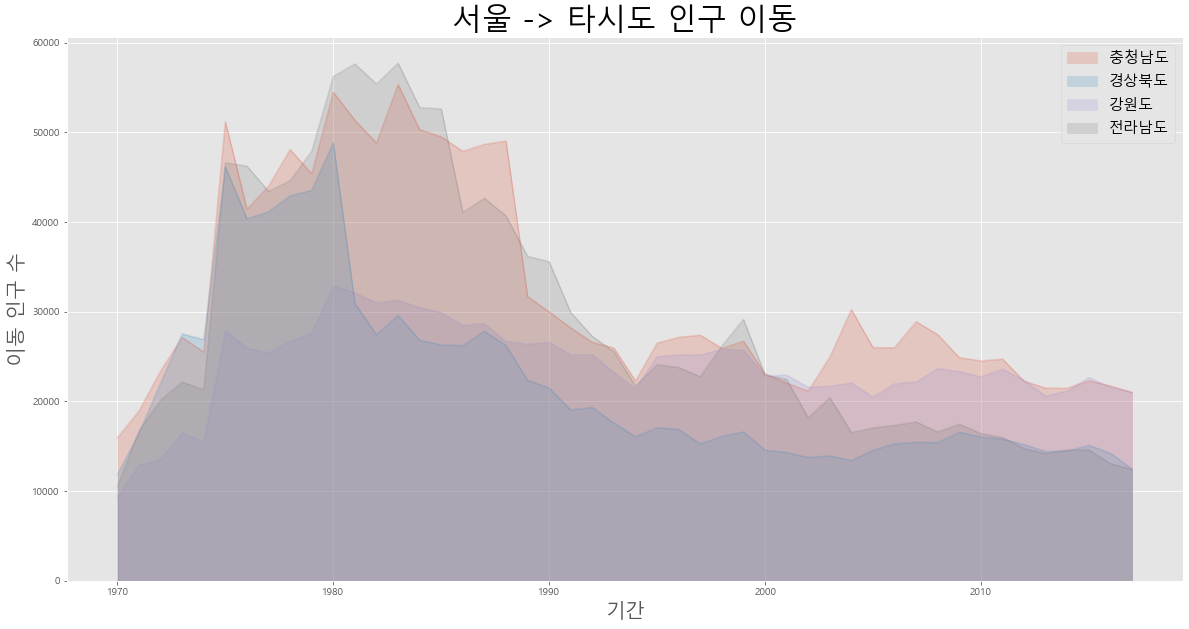

In [38]:
# 서울에서 '충청남도','경상북도','강원도','전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970,2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'], col_years]
df_4 = df_4.transpose()

plt.style.use('ggplot')

# 데이터프레임 인덱스를 정수형으로 변경
df_4.index = df_4.index.map(int)
# stacked = False
df_4.plot(kind = 'area', stacked = False, alpha = 0.2, figsize = (20,10))

plt.title('서울 -> 타시도 인구 이동', size = 30)
plt.ylabel('이동 인구 수', size = 20)
plt.xlabel('기간', size = 20)
plt.legend(loc = 'best', fontsize = 15)

plt.show()

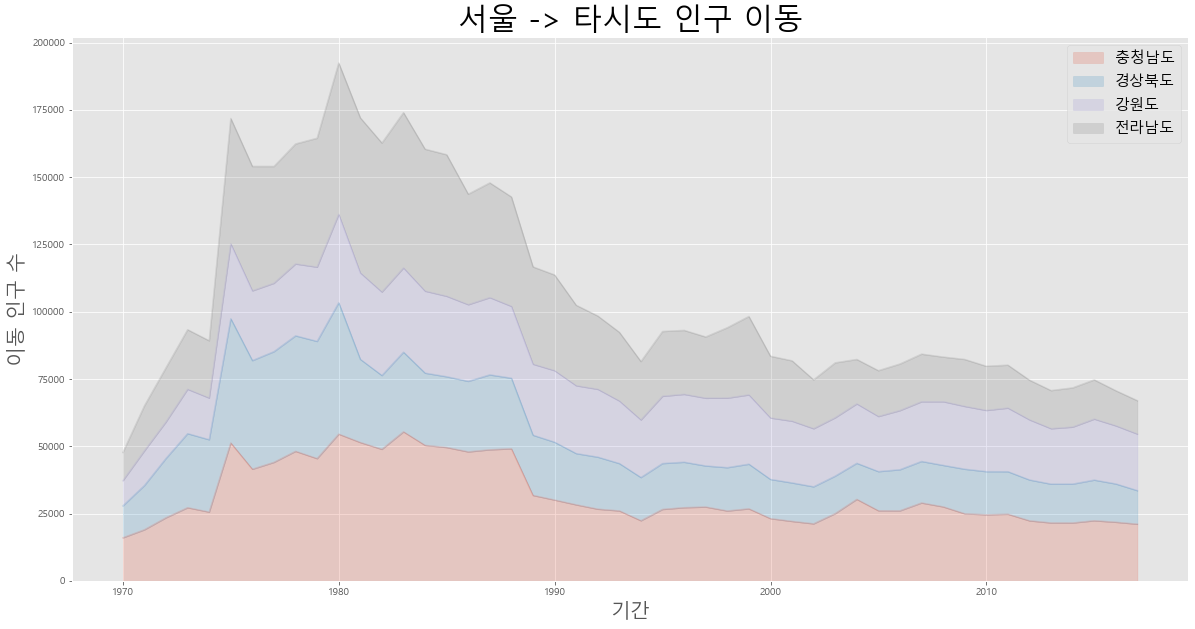

In [39]:
# stacked = True
df_4.plot(kind = 'area', stacked = True, alpha = 0.2, figsize = (20,10))

plt.title('서울 -> 타시도 인구 이동', size = 30)
plt.ylabel('이동 인구 수', size = 20)
plt.xlabel('기간', size = 20)
plt.legend(loc = 'best', fontsize = 15)

plt.show()

<class 'matplotlib.axes._subplots.AxesSubplot'>


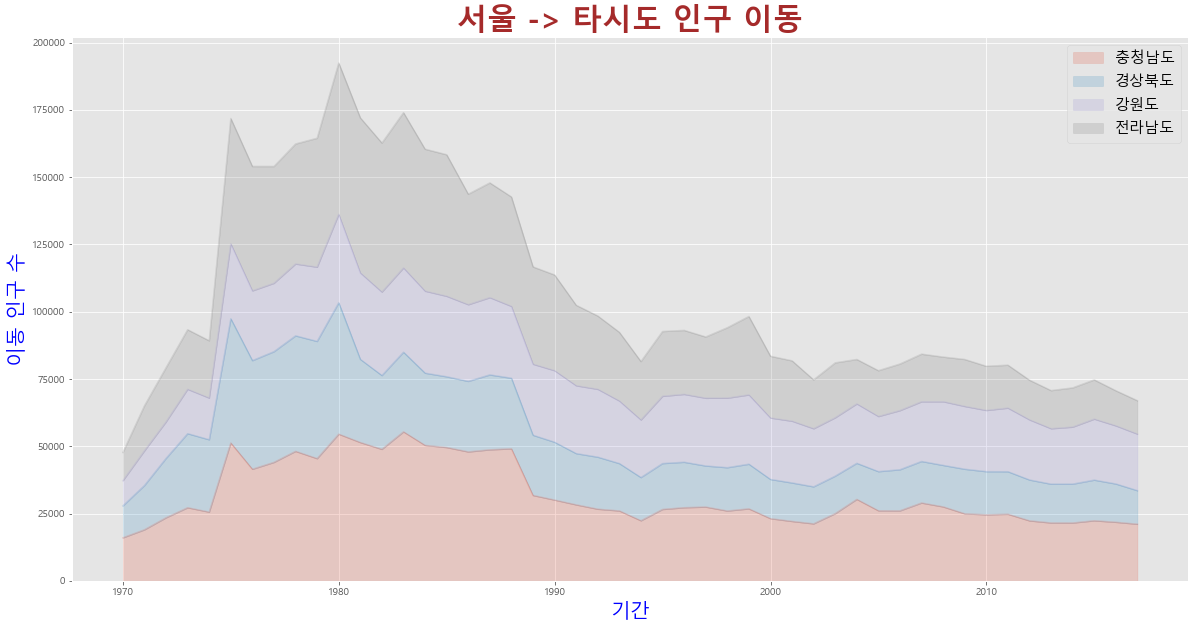

In [40]:
# axes 객체 속성 변경
ax = df_4.plot(kind = 'area', stacked = True, alpha = 0.2, figsize = (20,10))
print(type(ax))

# axe 객체 설정 변경
ax.set_title('서울 -> 타시도 인구 이동', size = 30, color = 'brown', weight = 'bold')
ax.set_ylabel('이동 인구 수', size = 20, color = 'blue')
ax.set_xlabel('기간', size = 20, color = 'blue')
ax.legend(loc = 'best', fontsize = 15)

plt.show()

#### 1-3. 막대그래프
- plot() 메소드에 kind = 'bar' 옵션 입력

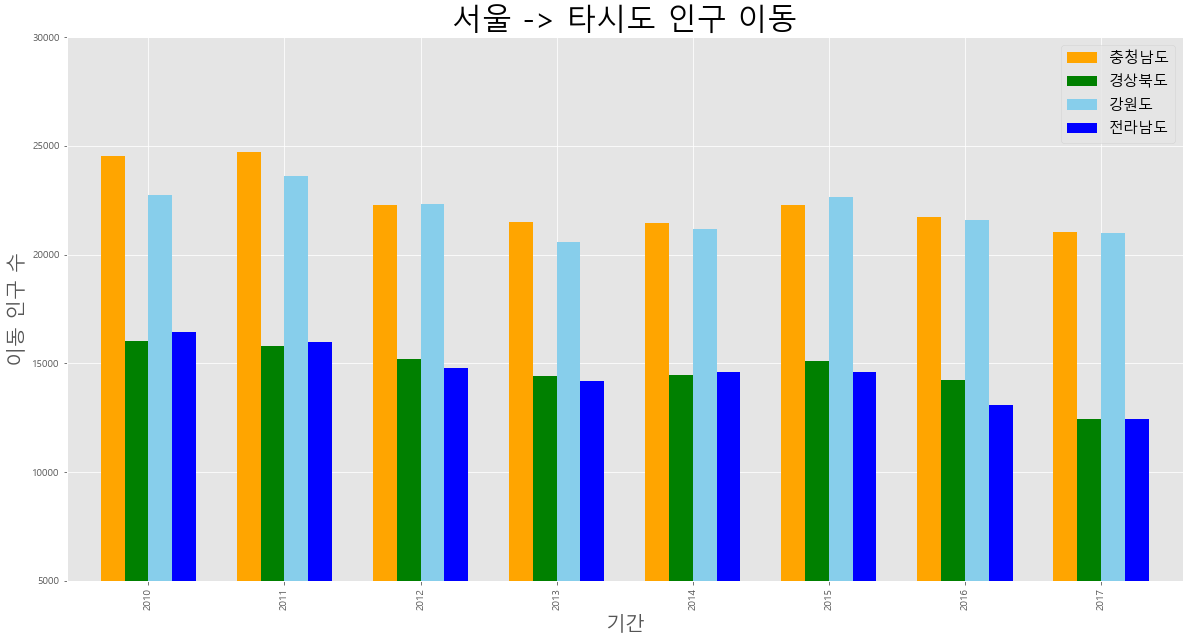

In [43]:
# 서울에서 '충청남도','경상북도','강원도','전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010,2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'], col_years]
df_4 = df_4.transpose()

plt.style.use('ggplot')

# 데이터프레임 인덱스를 정수형으로 변경
df_4.index = df_4.index.map(int)

# 막대 그래프 그리기
df_4.plot(kind = 'bar', figsize=(20,10), width = 0.7,
         color = ['orange','green','skyblue','blue'])
plt.title('서울 -> 타시도 인구 이동', size = 30)
plt.ylabel('이동 인구 수', size = 20)
plt.xlabel('기간', size = 20)
plt.ylim(5000,30000)
plt.legend(loc = 'best', fontsize = 15)

plt.show()

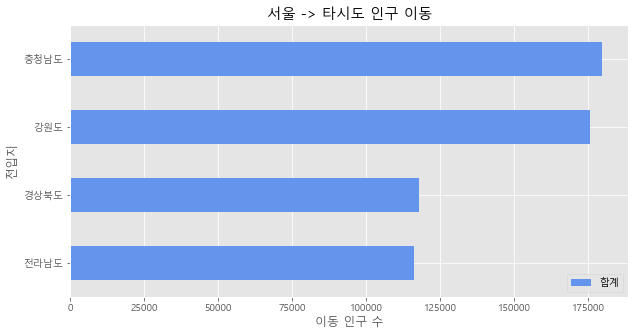

In [45]:
# 가로형 막대 그래프 : barh
col_years = list(map(str, range(2010,2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'], col_years]

# 2010 - 2017년 이동 인구 수를 합계하여 새로운 열로 추가
df_4['합계'] = df_4.sum(axis = 1)

# 가장 큰 값부터 정렬
df_total = df_4[['합계']].sort_values(by = '합계', ascending = True)

plt.style.use('ggplot')


# 수평 막대 그래프 그리기
df_total.plot(kind = 'barh', figsize=(10,5), width = 0.5,
         color = 'cornflowerblue')
plt.title('서울 -> 타시도 인구 이동')
plt.xlabel('이동 인구 수')
plt.ylabel('전입지')

plt.show()

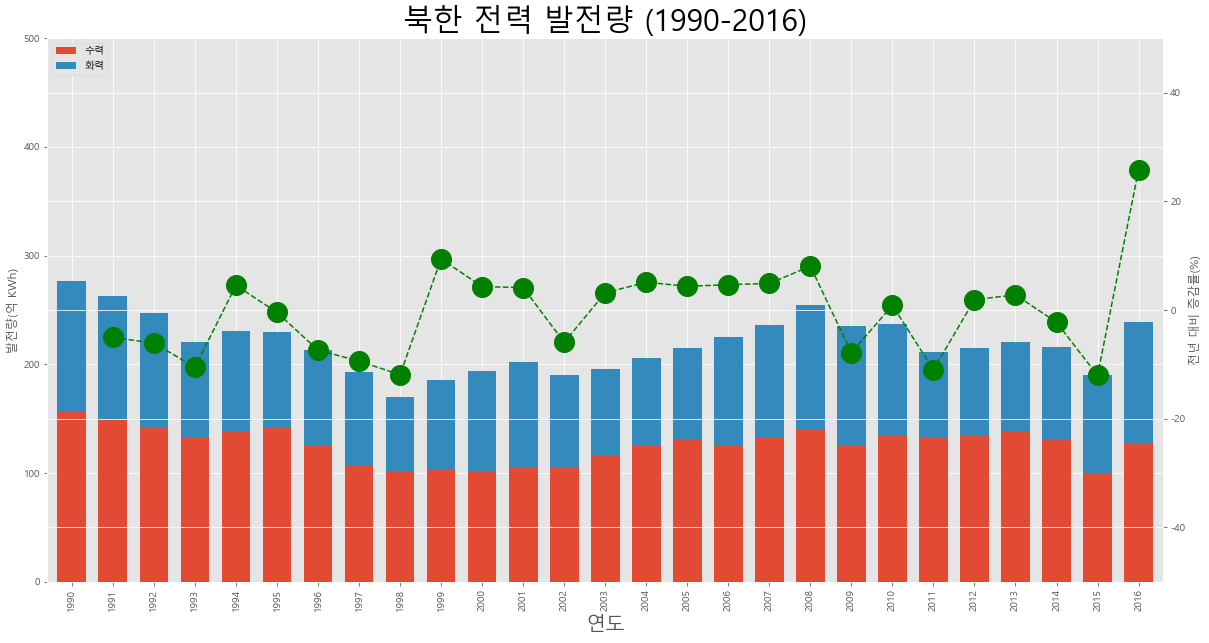

In [51]:
# 보조 축 활용하기 ( 2축 그래프 그리기)
plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정

df = pd.read_excel('./남북한발전전력량.xlsx', convert_float = True)
df = df.loc[5:9]
df.head()
df.drop('전력량 (억㎾h)', axis = 'columns', inplace = True)

df.set_index('발전 전력별', inplace = True)
df = df.T

# 증감률(변동률) 계산
df = df.rename(columns = {'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감률'] = ((df['총발전량']/df['총발전량 - 1년']) - 1) * 100

# 2축 그래프 그리기
ax1 = df[['수력','화력']].plot(kind = 'bar', figsize = (20,10), width = 0.7, stacked = True)
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감률, ls = '--', marker = 'o', markersize = 20,
        color = 'green', label = '전년대비 증감률(%)')

ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.set_xlabel('연도', size = 20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감률(%)')

plt.title('북한 전력 발전량 (1990-2016)', size = 30)
ax1.legend(loc = 'upper left')

plt.show()
# 2015년 수력 발전량이 일시적으로 급감한 것을 확인할 수 있따.
# 당시 기사를 통해 2015년 북한의 가뭄이 심각했기때문임을 추측할 수 있다.

#### 1-4. 히스토그램
- 단변수 데이터의 빈도수 그래프로 표현
- 구간을 나누는 간격 크기에 따라 빈도가 달라지고 모양이 변함

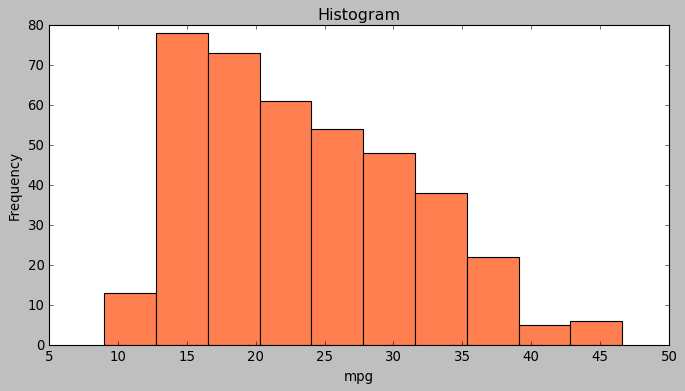

In [53]:
plt.style.use('classic')

df = pd.read_csv('./data/auto-mpg.csv', header = None)

df.columns = ['mpg','cylinders', 'displacement', 'horsepower','weight',
             'acceleration', 'model year', 'origin', 'name']

df['mpg'].plot(kind = 'hist', bins = 10, color = 'coral', figsize = (10,5))

plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

#### 1-5. 산점도
- 서로 다른 두 변수 사이의 관계 나타냄
- 각 변수는 연속되는 값을 가짐 ( 일반적으로 실수/정수형 )
- plot 메소드에 kind = 'scatter' 옵션 사용

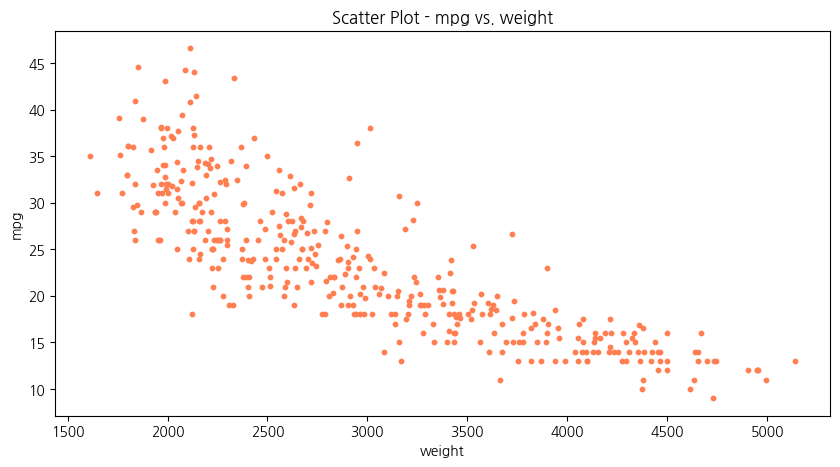

In [54]:
plt.style.use('default')

df.plot(kind = 'scatter', x='weight',y='mpg', c='coral', s=10, figsize = (10,5))
plt.title('Scatter Plot - mpg vs. weight')
plt.show()
# 자동차 무게와 연비 사이의 관계 표현

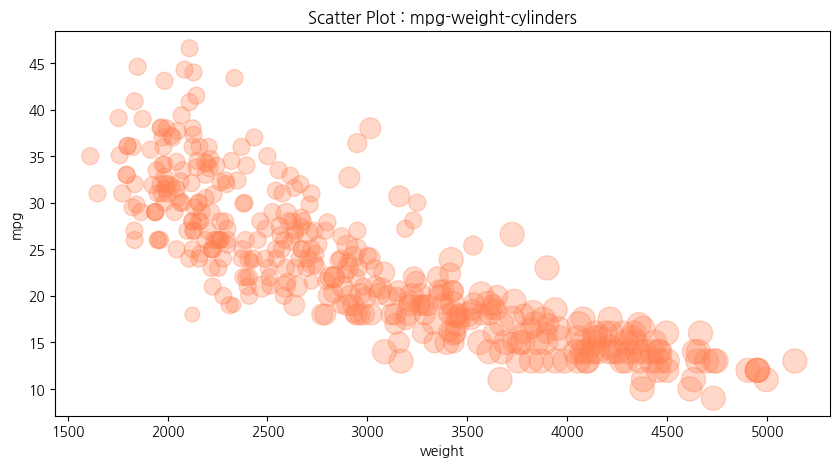

In [55]:
# 버블 차트 : 값의 크기에 따라 점의 크기가 다르게 표시되는 그래프
cylinders_size = df.cylinders/df.cylinders.max() * 300

df.plot(kind ='scatter', x='weight', y='mpg', c='coral', figsize=(10,5),
       s = cylinders_size, alpha=0.3)
plt.title('Scatter Plot : mpg-weight-cylinders')

plt.show()

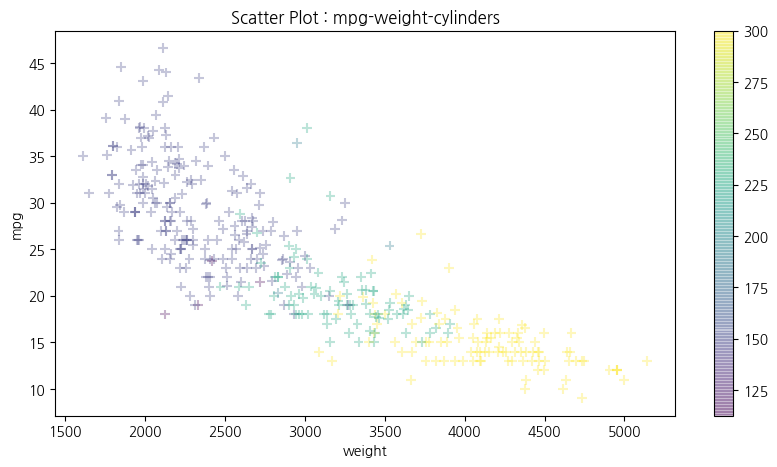

In [56]:
# 그래프 그림 파일로 저장하기
cylinders_size = df.cylinders/df.cylinders.max() * 300

df.plot(kind ='scatter', x='weight', y='mpg', marker = '+', figsize=(10,5),
       cmap = 'viridis',c = cylinders_size,s=50, alpha=0.3)
plt.title('Scatter Plot : mpg-weight-cylinders')

plt.savefig('./scatter.png')
plt.savefig('./scatter_transparent.png', transparent = True) #배경 투명하게 저장
plt.show()

#### 1-6. 파이차트
- 조각의 크기는 해당 변수에 속하는 데이터 값의 크기에 비례함
- plot() 메소드에 kind = 'pie' 옵션 사용

           mpg  cylinders  displacement    weight  acceleration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


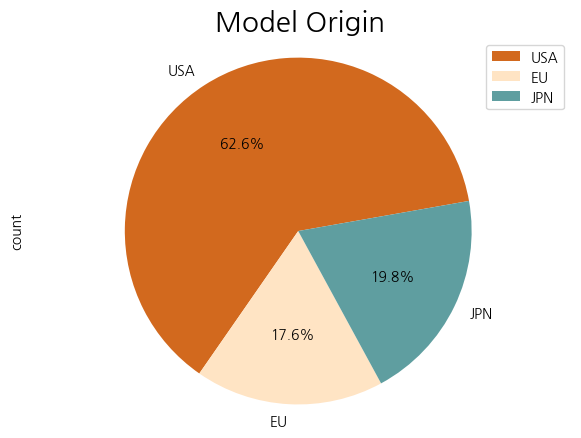

In [57]:
plt.style.use('default')
# 데이터 개수 카운트를 위해 값 1을 가진 열 추가
df['count'] = 1
df_origin = df.groupby('origin').sum()
print(df_origin.head())

# 제조 국가값을 실제 지역명으로 변경
df_origin.index = ['USA','EU', 'JPN']

# 파이차트 그리기
df_origin['count'].plot(kind = 'pie', figsize = (7,5),
                       autopct = '%1.1f%%', # 퍼센트 표시
                       startangle = 10, # 파이 조각 나누는 시작점
                       colors = ['chocolate', 'bisque', 'cadetblue'])
plt.title('Model Origin', size = 20)
plt.axis('equal') # 파이차트 비율ㅇ르 같게 조정
plt.legend(labels = df_origin.index, loc = 'upper right')
plt.show()

#### 1-7. 박스 플롯
- 범주형 데이터 분포 파악하는데 적합
- 최소값, 1분위, 중간값, 3분위, 최대값 제공

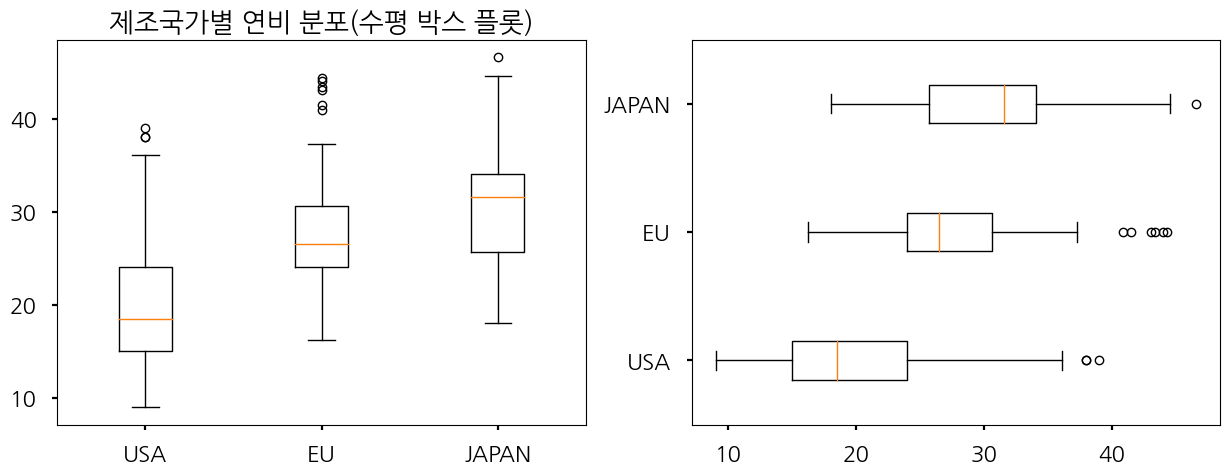

In [58]:
plt.style.use('seaborn-poster')
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
           labels = ['USA','EU','JAPAN'])
ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
           labels = ['USA','EU','JAPAN'],
           vert = False) #  수평 박스 플롯 

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax1.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()

### 2.  Seaborn 라이브러리
- Matplotlib의 기능과 스타일 확장한 파이썬 시각화 도구 고급 버전

In [2]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

# 데이터 살펴보기
print(titanic.head())
print("\n")
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

#### 회귀선이 있는 산점도
- regplot() : 서로 다른 2개의 연속 변수 사이의 산점도 그린 후 선형회귀분석에의한 회귀선 나타냄
- fit_reg = False : 회귀선 안보이게 설정

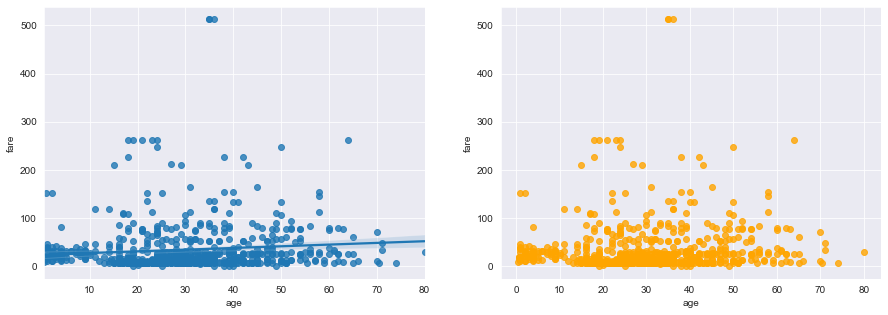

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# 스타일 테마 설정 (darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 그래프 그리기 - 선형회귀선 표시
sns.regplot(x='age', y='fare', data=titanic, ax=ax1)

# 선형회귀선 미표시
sns.regplot(x='age', y='fare',color='orange', data=titanic, ax=ax2, fit_reg=False)

plt.show()

#### 히스토그램/커널 밀도 그래프
- distplot() : 단변수 데이터 분포 확인
 - 기본값으로 히스토그램(hist), 커널 밀도 함수(kde) 그래프 출력

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms)

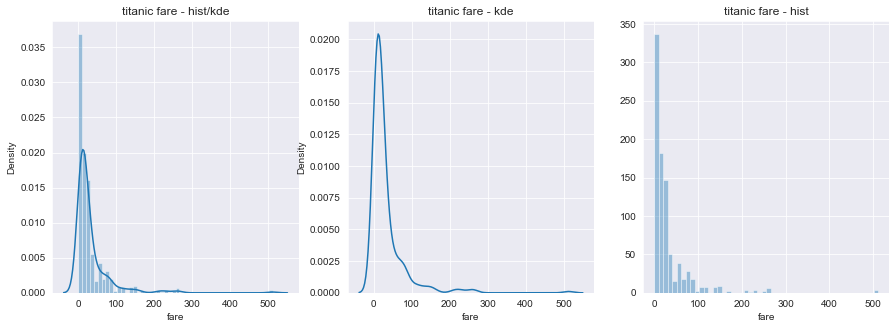

In [6]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 기본값
sns.distplot(titanic['fare'], ax=ax1)
# hist = False
sns.distplot(titanic['fare'], hist=False, ax=ax2)
# kde = False
sns.distplot(titanic['fare'], kde = False, ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic fare - hist/kde')
ax2.set_title('titanic fare - kde')
ax3.set_title('titanic fare - hist')

plt.show()

#### 히트맵
- heatmap()
    - 2개의 범주형 변수를 x,y축에 두고 데이터를 매트릭스 형태로 분류
    - aggfunc = 'size' : 데이터 값의 크기 기준으로 집계

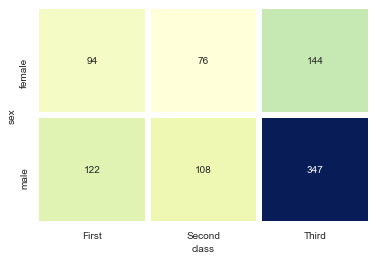

In [9]:
# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')

sns.heatmap(table, # 데이터프레임
           annot = True, fmt = 'd', # 데이터 값 표시 여부, 정수형 포맷
           cmap = 'YlGnBu', # 컬러 맵
           linewidth = 5, # 구분 선
           cbar = False) # 컬러 바 표시 여부
plt.show()
# 여자 승객보다 남자 승객이 상대적으로 많은 편이며, 
# 특히 3등석의 경우 남자 승객의 수가 압도적으로 많은 것을 확인할 수 있다.

#### 범주형 데이터의 산점도
- 각 범주별 데이터의 분포 확인
- stripplot()
- swarmplot() : 데이터의 분산까지 고려 -> 데이터가 퍼져있는 정도 입체적으로 확인 가능

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


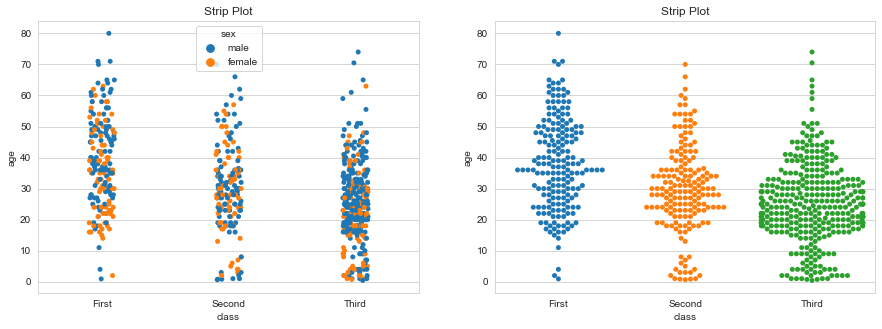

In [11]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 이산형 변수 분포 - 데이터 분산 미고려, 남녀 성별을 색상으로 구분
sns.stripplot(x='class', y='age', data=titanic, ax=ax1, hue='sex')

# 이선형 변수 분포 - 데이터 분산 고려(중복X)
sns.swarmplot(x='class', y='age', data=titanic, ax=ax2)

ax1.set_title('Strip Plot')
ax2.set_title('Strip Plot')

plt.show()

#### 막대그래프
- barplot()

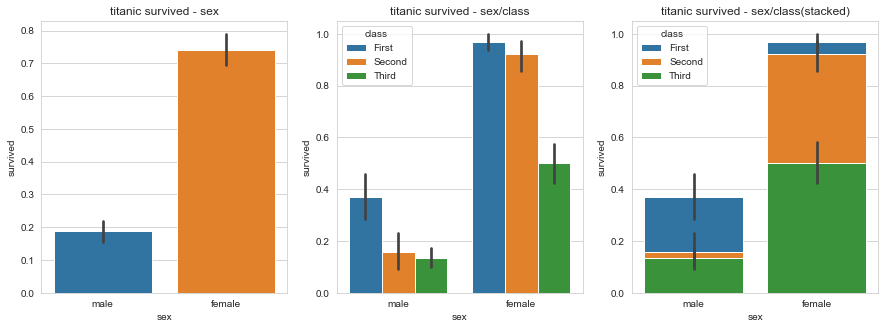

In [12]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)

# hue 옵션 추가
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2)

# hue 옵션 추가하여 누적 출력
sns.barplot(x='sex', y='survived', hue='class', data=titanic, dodge=False, ax=ax3)

ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

#### 빈도 그래프
- countplot() : 각 범주에 속하는 데이터 개수를 막대그래프로 나타냄

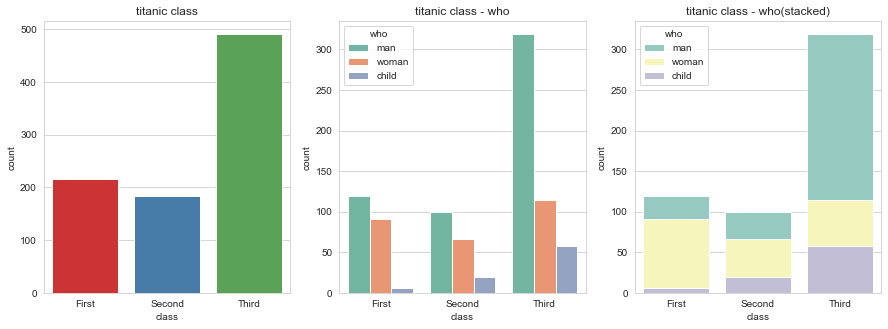

In [15]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 기본값 , palette : 그래프 색 구성 다르게 설정
sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1)

# hue 옵션에 'who' 추가
sns.countplot(x='class', hue='who', palette='Set2', data=titanic, ax=ax2)

# dodge=False 옵션 추가 (누적그래프 출력)
sns.countplot(x='class', hue='who', palette='Set3',
              dodge=False, data=titanic, ax=ax3)

ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

#### 박스 플롯/바이올린 그래프
- boxplot() : 범주형 데이터 분포와 주요 통계 지표 함께 제공
- violinplot() : 박스플롯 + 커널 밀도 함수 그래프 y축 방향에 추가
    - 데이터의 분산 알 수 있음

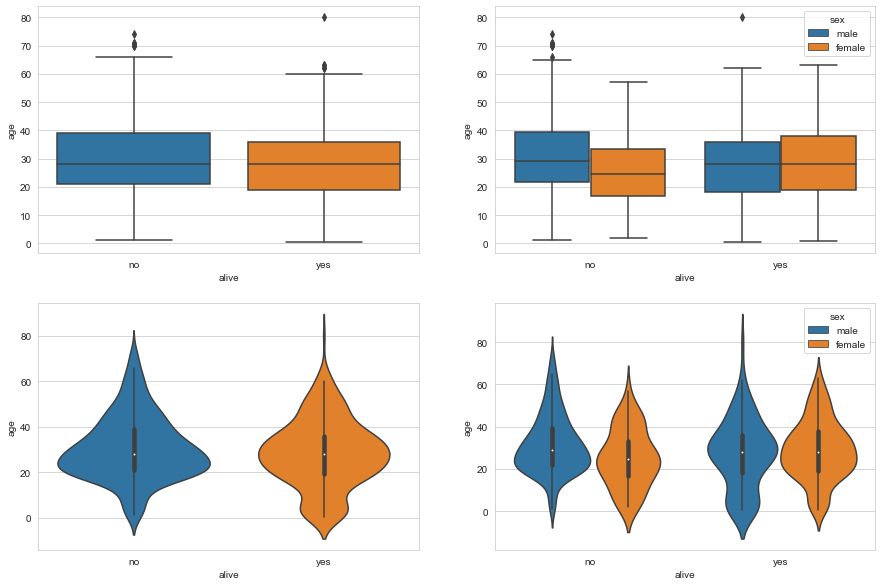

In [16]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# 박스 플롯 - 기본값
sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)

# 박스 플롯 - hue 변수 추가
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2)

# 바이올린 그래프 - 기본값
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3)
# 바이올린 그래프 - hue 변수 추가
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4)

plt.show()

#### 조인트 그래프
- jointplot() : 산점도 기본으로 표시하고, x-y축에 각 변수에 대한 히스토그램 동시에 보여줌.
    - 두 변수의 관계와 데이터가 분산되어 있는 정도 한눈에 파악하기 좋음

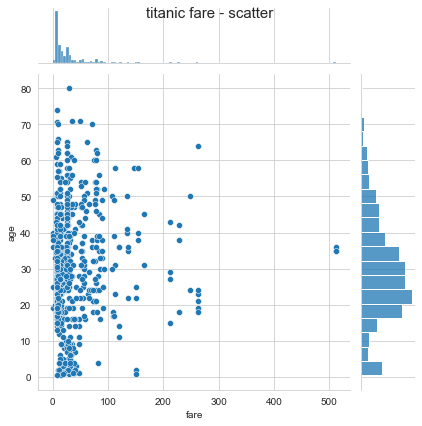

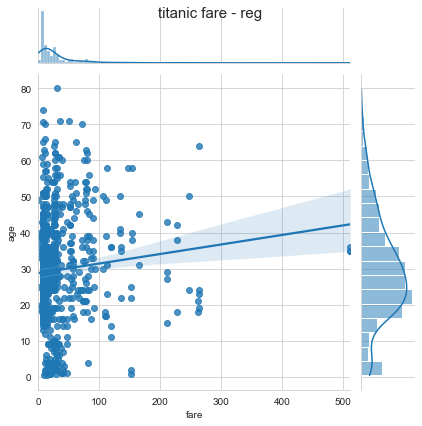

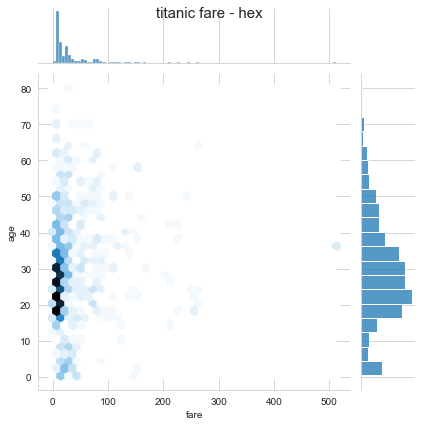

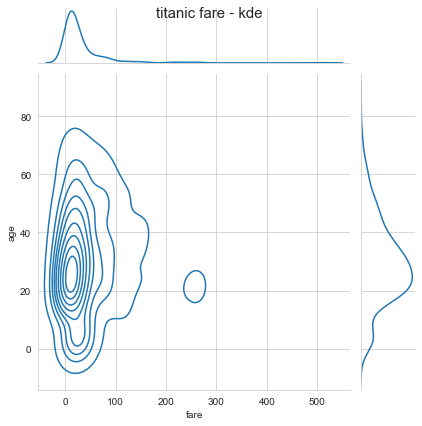

In [18]:
# 조인트 그래프 - 산점도(기본값)
j1 = sns.jointplot(x='fare', y='age', data=titanic)

# 조인트 그래프 - 회귀선
j2 = sns.jointplot(x='fare', y='age', kind='reg', data=titanic)

# 조인트 그래프 - 육각 그래프
j3 = sns.jointplot(x='fare', y='age', kind='hex', data=titanic)

# 조인트 그래프 - 커널 밀집 그래프
j4 = sns.jointplot(x='fare', y='age', kind='kde', data=titanic)

j1.fig.suptitle('titanic fare - scatter', size = 15)
j2.fig.suptitle('titanic fare - reg', size = 15)
j3.fig.suptitle('titanic fare - hex', size = 15)
j4.fig.suptitle('titanic fare - kde', size = 15)

plt.show()

#### 조건을 적용하여 화면을 그리드로 분할하기
- FacetGrid() : 행, 열 방향으로 서로 다른 조건을 적용하여 여러 개의 서브 플롯 만듦.

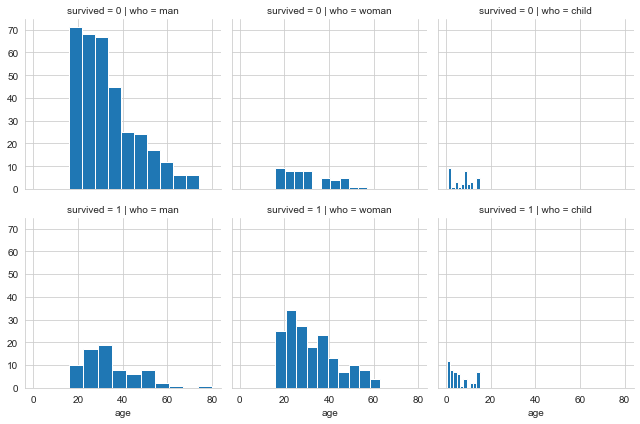

In [20]:
g = sns.FacetGrid(data=titanic, col='who', row='survived')

# 그래프 적용하기
g = g.map(plt.hist, 'age')

# 남성에 비해 여성 생존자가 상대적으로 많은 편이고, 주로 20-40대의 생존자가
# 많음을 확인할 수 있다.

#### 이변수 데이터의 분포
- pairplot() : 인자로 전달되는 데이터프레임의 열을 두 개씩 가능한 모든 조합에 대해 표현
    - 대각선 방향으로 히스토그램, 서로 다른 변수 간에는 산점도 그림

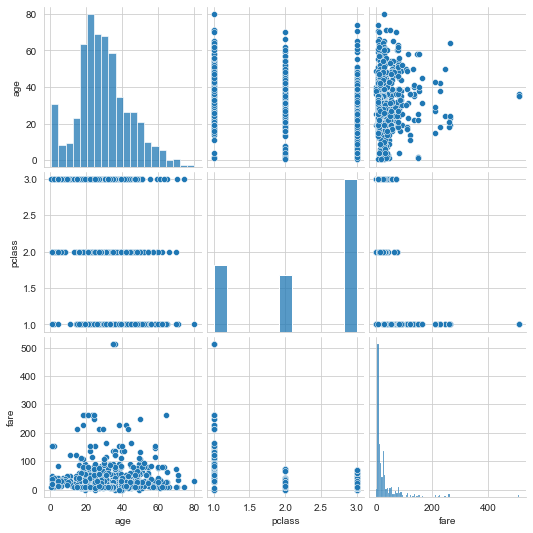

In [21]:
titanic_pair = titanic[['age','pclass','fare']]

g = sns.pairplot(titanic_pair)

### 3. Folium 라이브러리 - 지도 활용
- 지도 위에 시각화할 때 유용한 도구
- 세계 지도 기본 지원

#### 지도 만들기
- Map() : 지도 객체 생성
    - 줌, 화면 이동 가능
    - 웹 기반 지도 생성

In [25]:
import folium

# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55, 126.98], zoom_start = 12)
seoul_map

#### 지도 스타일 적용하기
- Map() 함수에 tiles 옵션 적용

In [27]:
seoul_map2 = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain',
                       zoom_start=12)
seoul_map2
# 지형을 보다 선명하게 확인할 수 있음.

In [28]:
seoul_map3 = folium.Map(location=[37.55,126.98], tiles='Stamen Toner',
                       zoom_start=15)
seoul_map3
# 흑백 스타일로 도로망 강조

#### 지도에 마커 표시하기

In [44]:
# 서울 시내 주요 대학교 위치 데이터 표시
import pandas as pd
df = pd.read_excel('./data/서울지역 대학교 위치.xlsx')
# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain',
                      zoom_start=12)

# 대학교 위치 정보 Marker로 표시
for name, lat, lng in zip(df['Unnamed: 0'], df.위도, df.경도):
    folium.Marker([lat,lng], popup=name).add_to(seoul_map)

seoul_map

In [47]:
seoul_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain',
                      zoom_start=12)

# 원형 마커 표시
for name, lat, lng in zip(df['Unnamed: 0'], df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                       radius = 10, # 원 반지름
                       color = 'brown', # 원 둘레 색상
                       fill = True, 
                       fill_color = 'coral', # 원 채우는 색
                       fill_opacity = 0.7, # 투명도
                       popup = name).add_to(seoul_map)
seoul_map

#### 지도 영역에 단계구분도 표시하기
- Choropleth()
- 행정구역과 같이 지도 상의 어떤 경계에 둘러싸인 영역에 색을 칠하거나 음영 등으로 정보를 나타내는 시각화 방법

In [56]:
import json

file_path = './data/경기도인구데이터.xlsx'
df = pd.read_excel(file_path, index_col='구분')
df.cloumns = df.columns.map(str)

# 경기도 시군구 경계 정보를 가진 geo-json 파일 불러오기
geo_path = './data/경기도행정구역경계.json'
try:
    geo_data = json.load(open(geo_path, encoding='utf-8'))
except:
    geo_data = json.load(open(geo_path, endocing = 'utf-8-sig'))
    
# 경기도 지도 만들기
g_map = folium.Map(location=[37.5502, 126.982],
                  tiles = 'Stamen Terrain', zoom_start = 9)
# 출력할 연도 선택
year = 2007

# Choropleth 클래스로 단계구분도 표시하기
folium.Choropleth(geo_data=geo_data, # 지도 경계
                 data = df[year], # 표시하려는 데이터
                 columns = [df.index, df[year]], # 열 지정
                 fill_color ='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                 threshold_scale = [10000,100000, 300000, 500000, 700000],
                 key_on = 'feature.properties.name').add_to(g_map)
g_map
# 2007년 경기도 지역 인구 수

<ipython-input-56-5ea80696c664>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.cloumns = df.columns.map(str)
